In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [47]:
df=pd.read_csv(r"C:\Users\ISHA\Desktop\TE (6TH SEM)\SL3\Datasets\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
df.shape

(150, 6)

In [51]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values 

In [53]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
label_map = {label: idx for idx, label in enumerate(df['Species'].unique())}
df['Species'] = df['Species'].map(label_map)
X = df.drop(columns=['Species']).values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(45, 5)
(105,)
(45,)


In [55]:
nb = NaiveBayesClassifier()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [56]:
def custom_confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for actual, pred in zip(y_true, y_pred):
        cm[actual][pred] += 1
    return cm

cm = custom_confusion_matrix(y_test, y_pred, num_classes=len(label_map))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


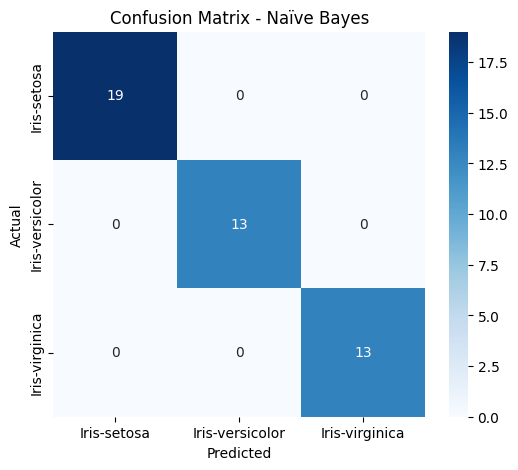

In [57]:
label_names = {v: k for k, v in label_map.items()}
class_labels = [label_names[i] for i in range(len(label_names))]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

In [58]:
def evaluate(cm):
    for i in range(len(cm)):
        TP = cm[i, i]
        FP = sum(cm[:, i]) - TP
        FN = sum(cm[i, :]) - TP
        TN = cm.sum() - (TP + FP + FN)

        accuracy = (TP + TN) / cm.sum()
        error_rate = 1 - accuracy
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        print(f"\nClass {i}:")
        print(f"TP={TP}, FP={FP}, FN={FN}, TN={TN}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Error Rate: {error_rate:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")

evaluate(cm)


Class 0:
TP=19, FP=0, FN=0, TN=26
Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00

Class 1:
TP=13, FP=0, FN=0, TN=32
Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00

Class 2:
TP=13, FP=0, FN=0, TN=32
Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00


In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

